In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score,roc_curve,precision_recall_curve
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
import seaborn as sns



preprocessing

In [3]:
df=pd.read_csv("Breast_Cancer.csv")
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [5]:
df.isnull().sum()


Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [6]:
print(pd.unique(df['Marital Status']))
print(pd.unique(df['T Stage ']))
print(pd.unique(df['N Stage']))
print(pd.unique(df['6th Stage']))
print(pd.unique(df['differentiate']))
print(pd.unique(df['A Stage']))
print(pd.unique(df['Status']))


['Married' 'Divorced' 'Single ' 'Widowed' 'Separated']
['T1' 'T2' 'T3' 'T4']
['N1' 'N2' 'N3']
['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
['Regional' 'Distant']
['Alive' 'Dead']


In [7]:
#drop features
df.drop(['Race','Marital Status'],axis=1,inplace=True)

In [8]:
df.head()

,Age,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [9]:
#label encoder
encoded_features=['T Stage ','N Stage','6th Stage','differentiate','Grade','A Stage','Estrogen Status','Progesterone Status','Status']
le=LabelEncoder()
for feature in encoded_features:
    df[feature]=le.fit_transform(df[feature])
df.head()

,Age,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,1,0,1,1,3,1,41,1,1,3,1,50,0


In [10]:
x=df.drop(['Status'],axis=1)
y=df['Status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Status
0    3408
1     616
Name: count, dtype: int64
Status
0    84.691849
1    15.308151
Name: proportion, dtype: float64


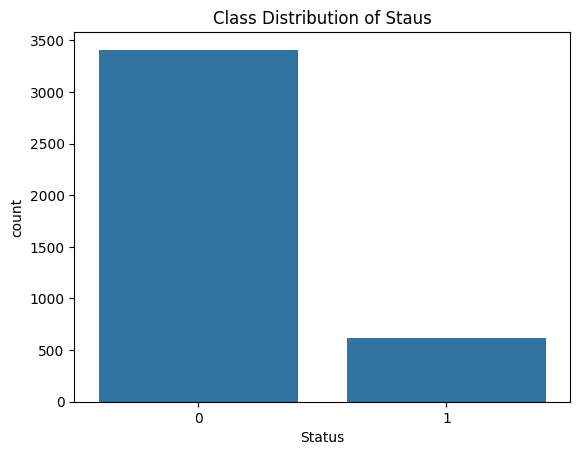

In [11]:
#plot distribution of data
print(df['Status'].value_counts())
print(df['Status'].value_counts(normalize=True)*100)
sns.countplot(x='Status',data=df)
plt.title('Class Distribution of Staus')
plt.show()


In [12]:
#over sampling
smot_en=SMOTEENN(random_state=42)
x_resampled,y_resampled=smot_en.fit_resample(x_train,y_train)


Status
1    2416
0    1809
Name: count, dtype: int64


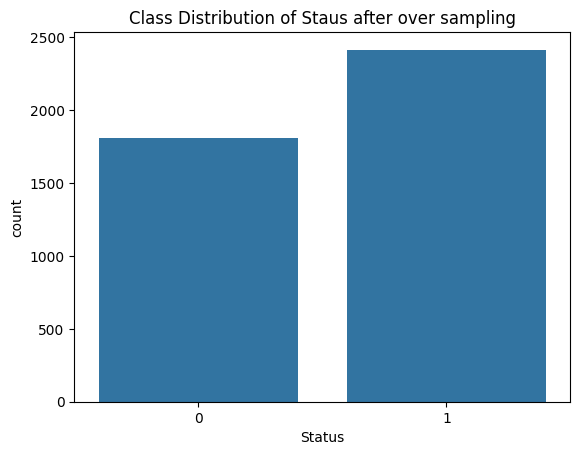

In [14]:
#plot distribution of data
print(y_resampled.value_counts())
sns.countplot(x=y_resampled)
plt.title('Class Distribution of Staus after over sampling')
plt.show()

choose best parameters

In [15]:
params={'n_estimators':[500],
        'max_depth':[2],
        'learning_rate':[0.01],
        'subsample':[0.8,1],
        'colsample_bytree':[0.8,1],
        'reg_lambda':[1],
        'reg_alpha':[0],
        'min_child_weight':[4]}

XGBoost Model

In [16]:
xgb=XGBClassifier(eval_metric='auc',random_state=42,class_weight='balanced')
grid=GridSearchCV(xgb,params,scoring='roc_auc',cv=5,n_jobs=-1)
grid.fit(x_resampled,y_resampled)
print(f"Best Parameters: {grid.best_params_}")
print(f"Best CV AUC: {grid.best_score_}")


C:\Users\ahmed\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [10:42:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
Best CV AUC: 0.9444384464091613


model fit

In [17]:
XGB=XGBClassifier(**grid.best_params_,eval_metric="auc")
XGB.fit(x_resampled,y_resampled)
print(f'Training AUC: {roc_auc_score(y_train,XGB.predict_proba(x_train)[:,1])}')

Training AUC: 0.8651055672704441


xgboost classification report, confusion matrix and heatmap

[[582 103]
 [ 27  93]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       685
           1       0.47      0.78      0.59       120

    accuracy                           0.84       805
   macro avg       0.72      0.81      0.74       805
weighted avg       0.88      0.84      0.85       805



Text(0.5, 1.0, 'heat map of confusion matrix for xgboost')

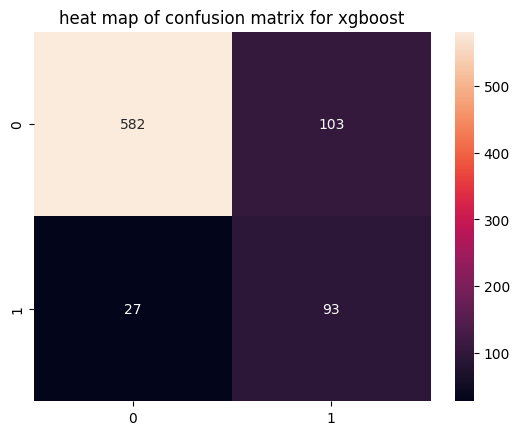

In [19]:
y_pred_xgb=XGB.predict(x_test)
y_proba_xgb = XGB.predict_proba(x_test)[:, 1]
cm=confusion_matrix(y_test,y_pred_xgb)
print(cm)

print(classification_report(y_test,y_pred_xgb))
sns.heatmap(cm,annot=True,fmt='d')
plt.title('heat map of confusion matrix for xgboost')

ROC curve and AUC score

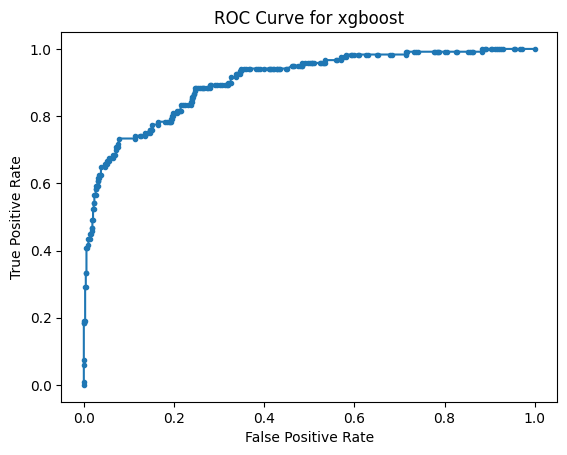

AUC Score: 0.9043491484184916


In [21]:
y_proba_xgb = XGB.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for xgboost')
plt.show()

# AUC Score
auc_score = roc_auc_score(y_test, y_proba_xgb)
print(f"AUC Score: {auc_score}")


Random Forest Model

model fit

In [22]:
rf=RandomForestClassifier(n_estimators=200,max_depth=7,random_state=42,class_weight='balanced')
rf.fit(x_resampled,y_resampled)
print(f'Training AUC: {roc_auc_score(y_train,rf.predict_proba(x_train)[:,1])}')


Training AUC: 0.896137887529172


Random forest classification report, confusion matrix and heatmap

[[619  66]
 [ 34  86]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       685
           1       0.57      0.72      0.63       120

    accuracy                           0.88       805
   macro avg       0.76      0.81      0.78       805
weighted avg       0.89      0.88      0.88       805



Text(0.5, 1.0, 'heat map of confusion matrix for Random forest')

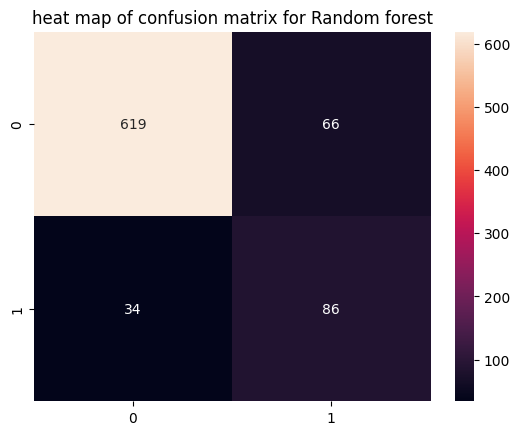

In [24]:
y_pred_rf=rf.predict(x_test)
y_proba_rf = rf.predict_proba(x_test)[:, 1]
cm=confusion_matrix(y_test,y_pred_rf)
print(cm)

print(classification_report(y_test,y_pred_rf))

sns.heatmap(cm,annot=True,fmt='d')
plt.title('heat map of confusion matrix for Random forest')

ROC curve and AUC score

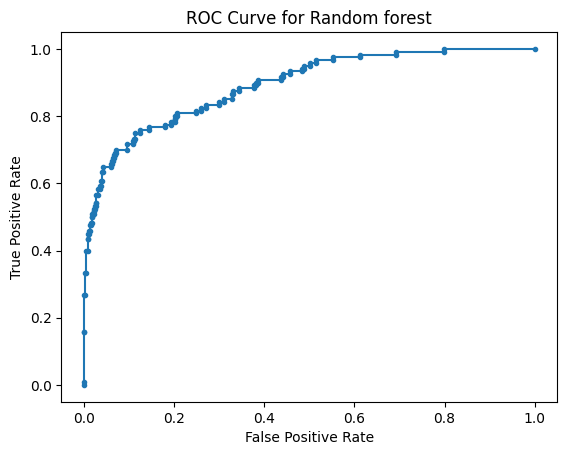

AUC Score: 0.892080291970803


In [25]:
y_prob_rf = rf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random forest')
plt.show()

# AUC Score
auc_score = roc_auc_score(y_test, y_prob_rf)
print(f"AUC Score: {auc_score}")

Voting classifier

model fit

In [26]:
rf=RandomForestClassifier(n_estimators=150,max_depth=7,random_state=42,class_weight='balanced')
XGB=XGBClassifier(**grid.best_params_,eval_metric="auc")
ensemble = VotingClassifier(
        estimators=[("rf", rf), ("xgb", XGB)],
        voting="soft"  
)
ensemble.fit(x_resampled,y_resampled)
print(f'Training AUC: {roc_auc_score(y_train,ensemble.predict_proba(x_train)[:,1])}')

Training AUC: 0.8818317380024403


Voting classification report, confusion matrix and heatmap

[[611  74]
 [ 31  89]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       685
           1       0.55      0.74      0.63       120

    accuracy                           0.87       805
   macro avg       0.75      0.82      0.77       805
weighted avg       0.89      0.87      0.88       805



Text(0.5, 1.0, 'heat map of confusion matrix for Voting classifier')

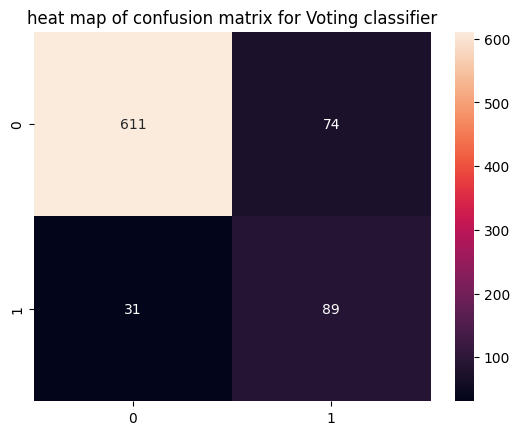

In [28]:
y_pred=ensemble.predict(x_test)
y_proba = ensemble.predict_proba(x_test)[:, 1]
cm=confusion_matrix(y_test,y_pred)
print(cm)

print(classification_report(y_test,y_pred))

sns.heatmap(cm,annot=True,fmt='d')
plt.title('heat map of confusion matrix for Voting classifier')

ROC curve and AUC score

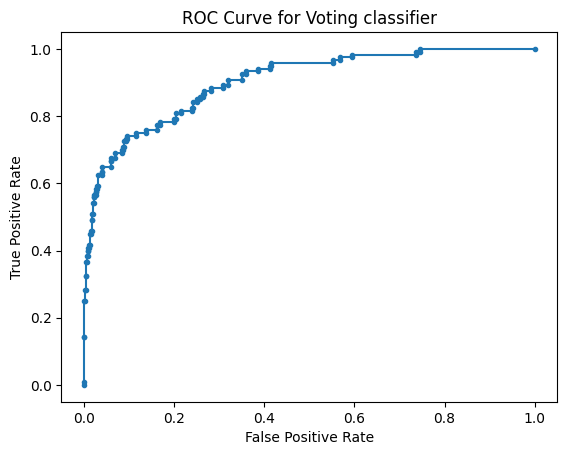

AUC Score: 0.9025425790754258


In [30]:

y_prob = ensemble.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting classifier')
plt.show()

# AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score}")

In [32]:
print(f'Training AUC: {roc_auc_score(y_train,ensemble.predict_proba(x_train)[:,1])}')
print("Testing Accuracy:",  {auc_score})

Training AUC: 0.8818317380024403
Testing Accuracy: {0.9025425790754258}


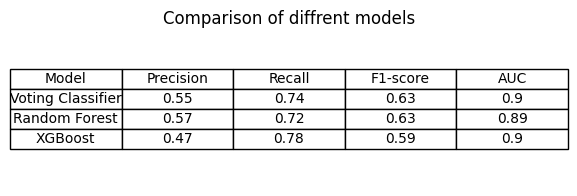

In [35]:
data = {
    "Model": ["Voting Classifier", "Random Forest", "XGBoost"],
    "Precision": [0.55, 0.57, 0.47],
    "Recall": [0.74, 0.72, 0.78],
    "F1-score": [0.63, 0.63, 0.59],
    "AUC": [0.90, 0.89, 0.90]
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(6,2))
ax.axis('off')
tbl = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc="center")
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)
plt.title('Comparison of diffrent models')
plt.show()




C:\Users\ahmed\AppData\Local\Temp\ipykernel_5916\1420209680.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=aucscores, palette='viridis')


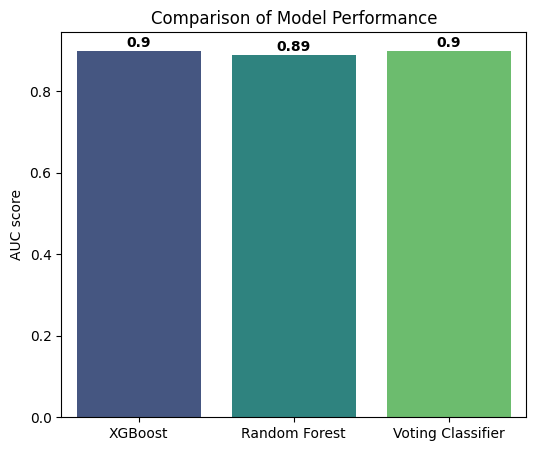

In [ ]:
models = [ 'XGBoost','Random Forest', 'Voting Classifier']
aucscores = [0.9, 0.89, 0.9]    

plt.figure(figsize=(6,5))
sns.barplot(x=models, y=aucscores, palette='viridis')
plt.title('Comparison of Model Performance')
plt.ylabel('AUC score')
for i, v in enumerate(aucscores):
    plt.text(i, v + 0.01, str(v), ha='center', fontweight='bold')

    
plt.show()


C:\Users\ahmed\AppData\Local\Temp\ipykernel_5916\1692374919.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=precisions, palette='viridis')


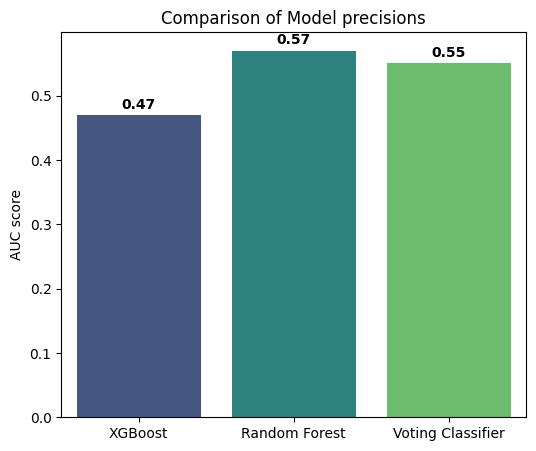

In [49]:
models = [ 'XGBoost','Random Forest', 'Voting Classifier']  
precisions=[0.47,0.57,0.55]



plt.figure(figsize=(6,5))
sns.barplot(x=models, y=precisions, palette='viridis')
plt.title('Comparison of Model precisions')
plt.ylabel('AUC score')
for i, v in enumerate(precisions):
    plt.text(i, v + 0.01, str(v), ha='center', fontweight='bold')

    
plt.show()


C:\Users\ahmed\AppData\Local\Temp\ipykernel_5916\554446696.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=recalls, palette='viridis')


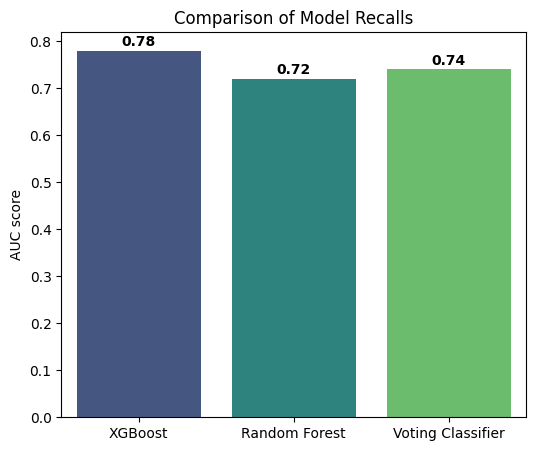

In [51]:
models = [ 'XGBoost','Random Forest', 'Voting Classifier']  
recalls=[0.78,0.72,0.74]



plt.figure(figsize=(6,5))
sns.barplot(x=models, y=recalls, palette='viridis')
plt.title('Comparison of Model Recalls')
plt.ylabel('AUC score')
for i, v in enumerate(recalls):
    plt.text(i, v + 0.01, str(v), ha='center', fontweight='bold')

    
plt.show()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_5916\2609419587.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=f1scores, palette='viridis')


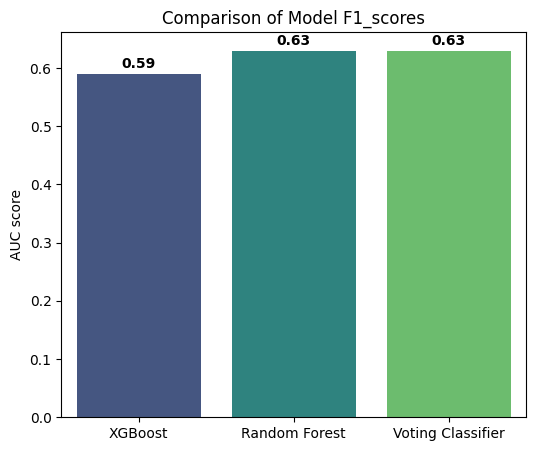

In [52]:
models = [ 'XGBoost','Random Forest', 'Voting Classifier']  
f1scores=[0.59,0.63,0.63]



plt.figure(figsize=(6,5))
sns.barplot(x=models, y=f1scores, palette='viridis')
plt.title('Comparison of Model F1_scores')
plt.ylabel('AUC score')
for i, v in enumerate(f1scores):
    plt.text(i, v + 0.01, str(v), ha='center', fontweight='bold')

    
plt.show()